In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 


df = pd.read_csv('./breast-cancer-wisconsin.data.txt')

col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names
# Dropping useless stuff
df.drop("Id", axis=1, inplace=True)

# Converting object to number
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
corr = df.corr()
print(corr['Class'].sort_values(ascending=False))

Class                          1.000000
Bare_Nuclei                    0.822563
Uniformity_Cell_Shape          0.818794
Uniformity_Cell_Size           0.817772
Bland_Chromatin                0.756732
Clump_thickness                0.716509
Normal_Nucleoli                0.712067
Marginal_Adhesion              0.696605
Single_Epithelial_Cell_Size    0.682618
Mitoses                        0.423008
Name: Class, dtype: float64


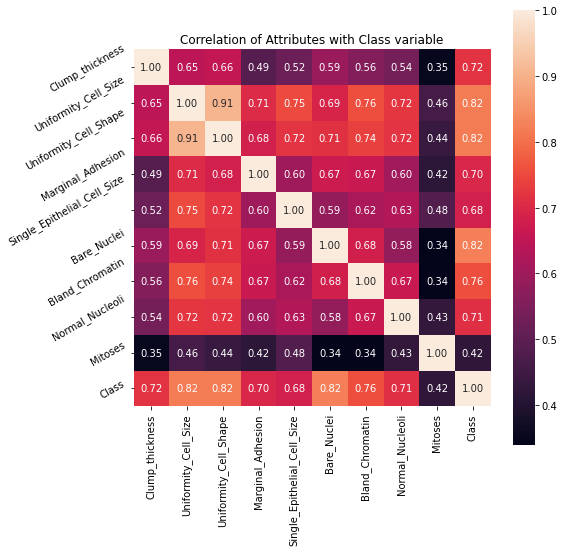

In [5]:
plt.figure(figsize=(8,8))
plt.title('Correlation of Attributes with Class variable')

a = sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()


In [15]:
# feature vector and target vector
X = df.drop(['Class'], axis=1)
y = df['Class']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature engineering missing values in variables with the median
# Statistical measures used to fill missing values both in train and test set, we are extracting from the train set only. This is to avoid overfitting.
for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

# Feature engineering missing values in variables
# print(X_train.isnull().sum())
# print(X_test.isnull().sum())

#Feature scaling using z-score normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

     Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
62                 6                     3                      4   
193                3                     1                      1   
263                7                     9                      4   
222                7                     5                      6   
140                2                     1                      1   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
62                   1                            5          2.0   
193                  1                            2          1.0   
263                 10                           10          3.0   
222                  3                            3          8.0   
140                  1                            2          1.0   

     Bland_Chromatin  Normal_Nucleoli  Mitoses  
62                 3                9        1  
193                3                1        1  
263                5         

In [26]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)
print(knn.predict_proba(X_test))
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

[4 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 4 4 4 2 4 4 4 2 2 4 2 2 2 2 2 2
 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 4 4 4 4 4 2 4 4 2 4 4 2 2 4 2
 2 2 4 2 4 2 4 2 2 2 2 2 4 2 2 4 4 4 2 4 2 4 2 2 2 2 4 4 4 4 2 2 4 2 2 2 2
 4 2 2 2 2 4 2 2 4 2 2 4 4 4 2 2 4 2 2 4 4 2 4 2 2 2 2 4 4]
[[0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.66666667 0.

Training set score: 0.9803
Test set score: 0.9714
